In [25]:
import pandas as pd
import numpy as np

import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

import scipy.stats as st
from sklearn import ensemble, tree, linear_model

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import *
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.losses import MeanSquaredError
from tensorflow.keras.metrics import RootMeanSquaredError, MeanAbsolutePercentageError
from tensorflow.keras.optimizers import Adam

from sklearn.preprocessing import MinMaxScaler
from sklearn.utils import shuffle

In [26]:
folder_path = 'fixed-time-dataset'
file_name = '11_oktomvri.csv'

drop_columns = ['noise_dba']

In [27]:
df = pd.read_csv(f'{folder_path}/{file_name}', parse_dates=['date_time'], index_col='date_time').drop(columns = drop_columns)

In [28]:
df.head()

,sensor_id,lat,log,temperature,noise,pm10,humidity,pm25,relative_humidity,wind_speed,sea_level_pressure,solar_elevation_angle,solar_radiation,pressure,snow,uv,wind_direction,visibility,clouds
date_time,,,,,,,,,,,,,,,,,,,
2017-11-09 00:30:00,200cdb67-8dc5-4dcf-ac62-748db636e04e,41.975155,21.456479,15.0,54,85,56.0,75,88.534158,3.000000,1020.262889,-60.352424,0.0,983.889298,0.0,0.0,268.620340,4.947778,78.943889
2017-11-09 00:45:00,200cdb67-8dc5-4dcf-ac62-748db636e04e,41.975155,21.456479,15.0,63,71,56.0,64,88.726425,3.000000,1020.339086,-58.482791,0.0,983.947339,0.0,0.0,269.554467,4.427778,83.363889
2017-11-09 01:00:00,200cdb67-8dc5-4dcf-ac62-748db636e04e,41.975155,21.456479,NaN,41,43,56.0,38,89.066025,2.986333,1020.412789,-56.399951,0.0,984.011669,0.0,0.0,270.063361,4.091111,86.817778
2017-11-09 01:15:00,200cdb67-8dc5-4dcf-ac62-748db636e04e,41.975155,21.456479,15.0,41,42,55.0,36,89.455443,2.908583,1020.484463,-54.133954,0.0,984.080274,0.0,0.0,270.253975,4.609444,85.781111
2017-11-09 01:30:00,200cdb67-8dc5-4dcf-ac62-748db636e04e,41.975155,21.456479,15.0,51,42,55.0,37,89.798009,2.830833,1020.554562,-51.713857,0.0,984.151176,0.0,0.0,270.231231,5.127778,84.744444


In [29]:
df['temperature'] = df['temperature'].interpolate(method='linear')
df['humidity'] = df['humidity'].interpolate(method='linear')
df['visibility'] = df['visibility'].interpolate(method='linear')
df['pm25'] = df['pm25'].interpolate(method='linear')

In [30]:
df.dropna()

,sensor_id,lat,log,temperature,noise,pm10,humidity,pm25,relative_humidity,wind_speed,sea_level_pressure,solar_elevation_angle,solar_radiation,pressure,snow,uv,wind_direction,visibility,clouds
date_time,,,,,,,,,,,,,,,,,,,
2017-11-09 00:30:00,200cdb67-8dc5-4dcf-ac62-748db636e04e,41.975155,21.456479,15.0,54,85,56.0,75,88.534158,3.000000,1020.262889,-60.352424,0.0,983.889298,0.0,0.0,268.620340,4.947778,78.943889
2017-11-09 00:45:00,200cdb67-8dc5-4dcf-ac62-748db636e04e,41.975155,21.456479,15.0,63,71,56.0,64,88.726425,3.000000,1020.339086,-58.482791,0.0,983.947339,0.0,0.0,269.554467,4.427778,83.363889
2017-11-09 01:00:00,200cdb67-8dc5-4dcf-ac62-748db636e04e,41.975155,21.456479,15.0,41,43,56.0,38,89.066025,2.986333,1020.412789,-56.399951,0.0,984.011669,0.0,0.0,270.063361,4.091111,86.817778
2017-11-09 01:15:00,200cdb67-8dc5-4dcf-ac62-748db636e04e,41.975155,21.456479,15.0,41,42,55.0,36,89.455443,2.908583,1020.484463,-54.133954,0.0,984.080274,0.0,0.0,270.253975,4.609444,85.781111
2017-11-09 01:30:00,200cdb67-8dc5-4dcf-ac62-748db636e04e,41.975155,21.456479,15.0,51,42,55.0,37,89.798009,2.830833,1020.554562,-51.713857,0.0,984.151176,0.0,0.0,270.231231,5.127778,84.744444
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-03-02 22:45:00,200cdb67-8dc5-4dcf-ac62-748db636e04e,41.975155,21.456479,24.0,48,17,99.0,14,57.761531,3.000000,1019.622560,-52.704789,0.0,982.522899,0.0,0.0,331.080483,10.000000,25.000000
2022-03-02 23:00:00,200cdb67-8dc5-4dcf-ac62-748db636e04e,41.975155,21.456479,24.0,46,17,99.0,13,58.178665,3.000000,1019.584280,-53.676069,0.0,982.483911,0.0,0.0,329.667205,10.000000,25.000000
2022-03-02 23:15:00,200cdb67-8dc5-4dcf-ac62-748db636e04e,41.975155,21.456479,24.0,45,17,99.0,13,58.549056,3.000000,1019.553725,-54.341168,0.0,982.452439,0.0,0.0,330.618992,10.000000,25.000000


In [31]:
df.isnull().sum()

sensor_id                0
lat                      0
log                      0
temperature              0
noise                    0
pm10                     0
humidity                 0
pm25                     0
relative_humidity        0
wind_speed               0
sea_level_pressure       0
solar_elevation_angle    0
solar_radiation          0
pressure                 0
snow                     0
uv                       0
wind_direction           0
visibility               0
clouds                   0
dtype: int64

In [32]:
pm10_mean = df['pm10'].mean()
pm10_std = df['pm10'].std()

df = df[(df['pm10'] > (pm10_mean - 3 * pm10_std)) & (df['pm10'] < (pm10_mean + 3 * pm10_std))] #outliers removal

In [33]:
def move_to_first_column(name, df):
    first_column = df.pop(name)
    df.insert(0, name, first_column)
    return df

def df_to_X_y(df, window_size):
    df_as_np = df.to_numpy()
    X = []
    y = []
    
    for i in range(len(df_as_np) - window_size):
        row = [r for r in df_as_np[i:i+window_size]]
        X.append(row)
        label = [df_as_np[i+window_size][0], df_as_np[i+window_size][1]]
        y.append(label)
    
    return np.array(X), np.array(y)

def plot_predictions(model, X, y, y_df_test, start = 0, end = 100):
    predictions = model.predict(X)
    p_preds = predictions[:, 0]
    p_actuals = y[:, 0]
    n_preds = predictions[:, 1]
    n_actuals = y[:, 1]
    
    list_Year = [str(i).split(" ")[0][0:4] for i in list(y_df_test.index)]
    list_YM = [str(i).split(" ")[0][:-3] for i in  list(y_df_test.index)]
    
    df = pd.DataFrame(data = {'PM10 predictions': p_preds,
                                 'PM10 actuals': p_actuals,
                              'Noise predictions': n_preds,
                              'Noise actuals': n_actuals,
                                'sensor_id': y_df_test['sensor_id'],
                              'log': y_df_test['log'],
                              'lat': y_df_test['lat']
                             })
    
    df['Year'] = list_Year
    df['YM'] = list_YM
    
    df_yearly = df.groupby(['sensor_id', 'lat', 'log', 'Year', 'YM']).mean()
    df_yearly = df_yearly[['PM10 predictions', 'PM10 actuals', 'Noise predictions', 'Noise actuals']].reset_index()
    sns.set_style('darkgrid')
    sns.set(rc={'figure.figsize':(14,8)})

    ax = sns.lineplot(data=df_yearly, x ='YM', y = 'PM10 predictions', label = 'PM10 predicted values')
    bx = sns.lineplot(data=df_yearly, x ='YM', y = 'PM10 actuals', label = 'PM10 actual values')
    cx = sns.lineplot(data=df_yearly, x ='YM', y = 'Noise predictions', label = 'Noise predicted values')
    dx = sns.lineplot(data=df_yearly, x ='YM', y = 'Noise actuals', label = 'Noise actual values')


    plt.legend(bbox_to_anchor=(1, 1))
    plt.ylabel('PM10 (µg/m3)')
    plt.xlabel('Year')
    plt.legend(loc="upper left")
    plt.show()

    return df

def preprocess_output(y, X):
    p_training_mean = np.mean(X[:, :, 0])
    p_training_std = np.std(X[:, :, 0])
    y[:, 0] = np.abs((y[:, 0] - p_training_mean) / p_training_std)
    return y

In [34]:
df = move_to_first_column('noise', df)
df = move_to_first_column('pm10', df)

In [35]:
y_df = df.iloc[96:, :]
df.drop(columns = ['sensor_id', 'lat', 'log'], inplace = True)

In [36]:
scaler = MinMaxScaler()
df[list(df.columns)[1:]] = scaler.fit_transform(df[list(df.columns)[1:]])
df.head()

,pm10,noise,temperature,humidity,pm25,relative_humidity,wind_speed,sea_level_pressure,solar_elevation_angle,solar_radiation,pressure,snow,uv,wind_direction,visibility,clouds
date_time,,,,,,,,,,,,,,,,
2017-11-09 00:30:00,85,0.220238,0.469388,0.516854,0.340909,0.818695,0.113164,0.498549,0.077042,0.0,0.812181,0.0,0.0,0.659931,0.309236,0.789439
2017-11-09 00:45:00,71,0.273810,0.469388,0.516854,0.290909,0.820693,0.113164,0.499968,0.090144,0.0,0.812629,0.0,0.0,0.661751,0.276736,0.833639
2017-11-09 01:00:00,43,0.142857,0.469388,0.516854,0.172727,0.824221,0.112648,0.501341,0.104740,0.0,0.813125,0.0,0.0,0.662742,0.255694,0.868178
2017-11-09 01:15:00,42,0.142857,0.469388,0.505618,0.163636,0.828266,0.109716,0.502677,0.120620,0.0,0.813655,0.0,0.0,0.663113,0.288090,0.857811
2017-11-09 01:30:00,42,0.202381,0.469388,0.505618,0.168182,0.831825,0.106783,0.503983,0.137579,0.0,0.814202,0.0,0.0,0.663069,0.320486,0.847444


In [37]:
X, y = df_to_X_y(df, window_size = 96) # 24 hours
X.shape, y.shape

((147037, 96, 16), (147037, 2))

In [38]:
X_train, y_train = X[:round(len(X)*0.7)], y[:round(len(y)*0.7)] #70%
X_val, y_val = X[round(len(X)*0.7):round(len(X)*0.9)], y[round(len(y)*0.7):round(len(y)*0.9)]
X_test, y_test = X[round(len(X)*0.9):], y[round(len(y)*0.9):]

X_train.shape, X_val.shape, X_test.shape, y_train.shape, y_val.shape, y_test.shape

((102926, 96, 16),
 (29407, 96, 16),
 (14704, 96, 16),
 (102926, 2),
 (29407, 2),
 (14704, 2))

In [39]:
input_size = (96, 16)
output_size = 2

In [40]:
y_test_df = y_df.iloc[round(len(X) * 0.9):, :]

In [41]:
preprocess_output(y_train, X)
preprocess_output(y_val, X)
preprocess_output(y_test, X)

array([[0.33261006, 0.13095238],
       [0.33261006, 0.10714286],
       [0.31029996, 0.0952381 ],
       ...,
       [0.37723024, 0.16666667],
       [0.37723024, 0.16666667],
       [0.31029996, 0.13690476]])

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 64)                20736     
                                                                 
 dense (Dense)               (None, 8)                 520       
                                                                 
 dense_1 (Dense)             (None, 2)                 18        
                                                                 
Total params: 21,274
Trainable params: 21,274
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
3217/3217 [==============================] - 183s 56ms/step - loss: 0.0705 - root_mean_squared_error: 0.2655 - mean_absolute_percentage_error: 899.9742 - val_loss: 0.0420 - val_root_mean_squared_error: 0.2050 - val_mean_absolute_percentage_error: 66.4454
Epoch 2/10
3217/3217 [============================

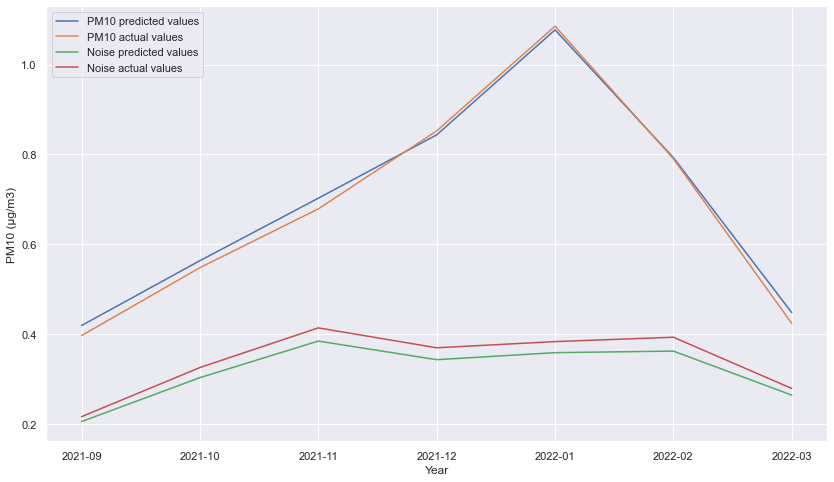

,PM10 predictions,PM10 actuals,Noise predictions,Noise actuals,sensor_id,log,lat,Year,YM
date_time,,,,,,,,,
2021-09-27 01:00:00,0.429340,0.33261,0.123452,0.130952,200cdb67-8dc5-4dcf-ac62-748db636e04e,21.456479,41.975155,2021,2021-09
2021-09-27 01:15:00,0.391432,0.33261,0.123367,0.107143,200cdb67-8dc5-4dcf-ac62-748db636e04e,21.456479,41.975155,2021,2021-09
2021-09-27 01:30:00,0.377321,0.31030,0.101761,0.095238,200cdb67-8dc5-4dcf-ac62-748db636e04e,21.456479,41.975155,2021,2021-09
2021-09-27 01:45:00,0.361172,0.37723,0.096290,0.089286,200cdb67-8dc5-4dcf-ac62-748db636e04e,21.456479,41.975155,2021,2021-09
2021-09-27 02:00:00,0.393801,0.37723,0.080492,0.077381,200cdb67-8dc5-4dcf-ac62-748db636e04e,21.456479,41.975155,2021,2021-09
...,...,...,...,...,...,...,...,...,...
2022-03-02 22:45:00,0.434394,0.37723,0.166177,0.184524,200cdb67-8dc5-4dcf-ac62-748db636e04e,21.456479,41.975155,2022,2022-03
2022-03-02 23:00:00,0.414991,0.37723,0.164492,0.172619,200cdb67-8dc5-4dcf-ac62-748db636e04e,21.456479,41.975155,2022,2022-03
2022-03-02 23:15:00,0.409208,0.37723,0.155406,0.166667,200cdb67-8dc5-4dcf-ac62-748db636e04e,21.456479,41.975155,2022,2022-03


In [18]:
model = Sequential()
model.add(InputLayer(input_size))
model.add(LSTM(64))
model.add(Dense(8, 'relu'))
model.add(Dense(output_size, 'linear'))

model.compile(loss=MeanSquaredError(), optimizer=Adam(learning_rate=0.0001), metrics=[
    RootMeanSquaredError(),
    MeanAbsolutePercentageError()
])

model.summary()

model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=10)

plot_predictions(model, X_test, y_test, y_test_df)

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_1 (LSTM)               (None, 64)                20736     
                                                                 
 dense_2 (Dense)             (None, 8)                 520       
                                                                 
 dense_3 (Dense)             (None, 2)                 18        
                                                                 
Total params: 21,274
Trainable params: 21,274
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
3217/3217 [==============================] - 159s 49ms/step - loss: 0.0970 - root_mean_squared_error: 0.3114 - mean_absolute_percentage_error: 1172.8859 - val_loss: 0.0482 - val_root_mean_squared_error: 0.2196 - val_mean_absolute_percentage_error: 72.9102
Epoch 2/10
3217/3217 [=========================

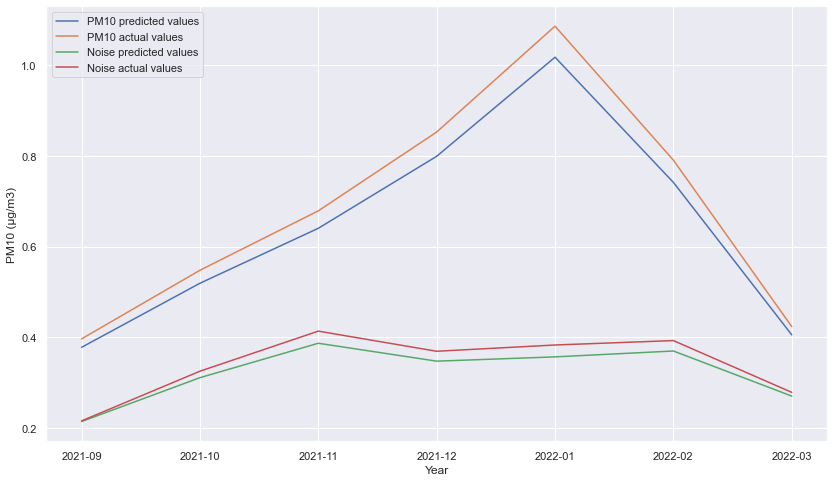

,PM10 predictions,PM10 actuals,Noise predictions,Noise actuals,sensor_id,log,lat,Year,YM
date_time,,,,,,,,,
2021-09-27 01:00:00,0.373812,0.33261,0.116008,0.130952,200cdb67-8dc5-4dcf-ac62-748db636e04e,21.456479,41.975155,2021,2021-09
2021-09-27 01:15:00,0.327660,0.33261,0.114188,0.107143,200cdb67-8dc5-4dcf-ac62-748db636e04e,21.456479,41.975155,2021,2021-09
2021-09-27 01:30:00,0.307756,0.31030,0.098847,0.095238,200cdb67-8dc5-4dcf-ac62-748db636e04e,21.456479,41.975155,2021,2021-09
2021-09-27 01:45:00,0.285054,0.37723,0.090855,0.089286,200cdb67-8dc5-4dcf-ac62-748db636e04e,21.456479,41.975155,2021,2021-09
2021-09-27 02:00:00,0.326282,0.37723,0.083411,0.077381,200cdb67-8dc5-4dcf-ac62-748db636e04e,21.456479,41.975155,2021,2021-09
...,...,...,...,...,...,...,...,...,...
2022-03-02 22:45:00,0.373158,0.37723,0.151389,0.184524,200cdb67-8dc5-4dcf-ac62-748db636e04e,21.456479,41.975155,2022,2022-03
2022-03-02 23:00:00,0.359174,0.37723,0.163009,0.172619,200cdb67-8dc5-4dcf-ac62-748db636e04e,21.456479,41.975155,2022,2022-03
2022-03-02 23:15:00,0.353887,0.37723,0.157827,0.166667,200cdb67-8dc5-4dcf-ac62-748db636e04e,21.456479,41.975155,2022,2022-03


In [19]:
model = Sequential()
model.add(InputLayer(input_size))
model.add(LSTM(64))
model.add(Dense(8, 'tanh'))
model.add(Dense(output_size, 'linear'))

model.compile(loss=MeanSquaredError(), optimizer=Adam(learning_rate=0.0001), metrics=[
    RootMeanSquaredError(),
    MeanAbsolutePercentageError()
])

model.summary()

model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=10)

plot_predictions(model, X_test, y_test, y_test_df)

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_2 (LSTM)               (None, 64)                20736     
                                                                 
 dense_4 (Dense)             (None, 8)                 520       
                                                                 
 dense_5 (Dense)             (None, 2)                 18        
                                                                 
Total params: 21,274
Trainable params: 21,274
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
3217/3217 [==============================] - 178s 55ms/step - loss: 0.2410 - root_mean_squared_error: 0.4910 - mean_absolute_percentage_error: 1492.8521 - val_loss: 0.1133 - val_root_mean_squared_error: 0.3366 - val_mean_absolute_percentage_error: 85.1582
Epoch 2/10
3217/3217 [=========================

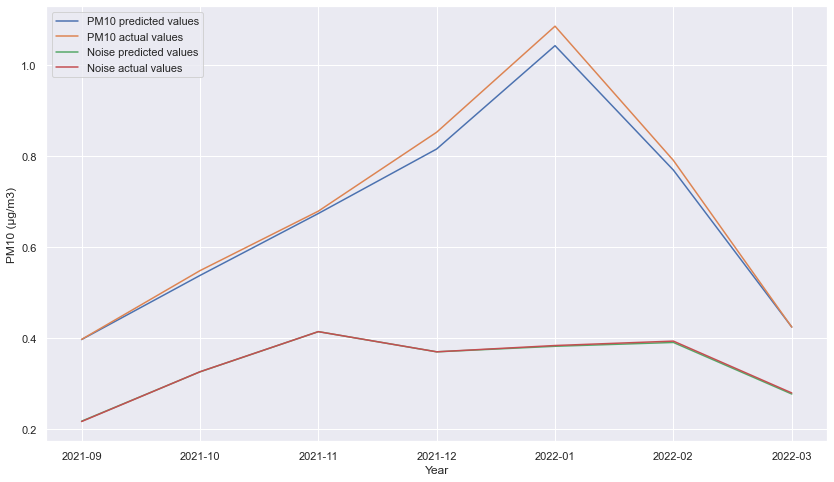

,PM10 predictions,PM10 actuals,Noise predictions,Noise actuals,sensor_id,log,lat,Year,YM
date_time,,,,,,,,,
2021-09-27 01:00:00,0.391370,0.33261,0.122808,0.130952,200cdb67-8dc5-4dcf-ac62-748db636e04e,21.456479,41.975155,2021,2021-09
2021-09-27 01:15:00,0.354727,0.33261,0.122653,0.107143,200cdb67-8dc5-4dcf-ac62-748db636e04e,21.456479,41.975155,2021,2021-09
2021-09-27 01:30:00,0.345328,0.31030,0.108216,0.095238,200cdb67-8dc5-4dcf-ac62-748db636e04e,21.456479,41.975155,2021,2021-09
2021-09-27 01:45:00,0.329648,0.37723,0.101133,0.089286,200cdb67-8dc5-4dcf-ac62-748db636e04e,21.456479,41.975155,2021,2021-09
2021-09-27 02:00:00,0.364311,0.37723,0.090748,0.077381,200cdb67-8dc5-4dcf-ac62-748db636e04e,21.456479,41.975155,2021,2021-09
...,...,...,...,...,...,...,...,...,...
2022-03-02 22:45:00,0.379262,0.37723,0.156322,0.184524,200cdb67-8dc5-4dcf-ac62-748db636e04e,21.456479,41.975155,2022,2022-03
2022-03-02 23:00:00,0.370425,0.37723,0.169250,0.172619,200cdb67-8dc5-4dcf-ac62-748db636e04e,21.456479,41.975155,2022,2022-03
2022-03-02 23:15:00,0.366303,0.37723,0.163990,0.166667,200cdb67-8dc5-4dcf-ac62-748db636e04e,21.456479,41.975155,2022,2022-03


In [20]:
model = Sequential()
model.add(InputLayer(input_size))
model.add(LSTM(64))
model.add(Dense(8, 'sigmoid'))
model.add(Dense(output_size, 'linear'))

model.compile(loss=MeanSquaredError(), optimizer=Adam(learning_rate=0.0001), metrics=[
    RootMeanSquaredError(),
    MeanAbsolutePercentageError()
])

model.summary()

model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=10)

plot_predictions(model, X_test, y_test, y_test_df)

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_3 (LSTM)               (None, 64)                20736     
                                                                 
 dense_6 (Dense)             (None, 8)                 520       
                                                                 
 dense_7 (Dense)             (None, 2)                 18        
                                                                 
Total params: 21,274
Trainable params: 21,274
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
3217/3217 [==============================] - 177s 54ms/step - loss: 0.1015 - root_mean_squared_error: 0.3186 - mean_absolute_percentage_error: 560.7211 - val_loss: 0.0444 - val_root_mean_squared_error: 0.2108 - val_mean_absolute_percentage_error: 69.5082
Epoch 2/10
3217/3217 [==========================

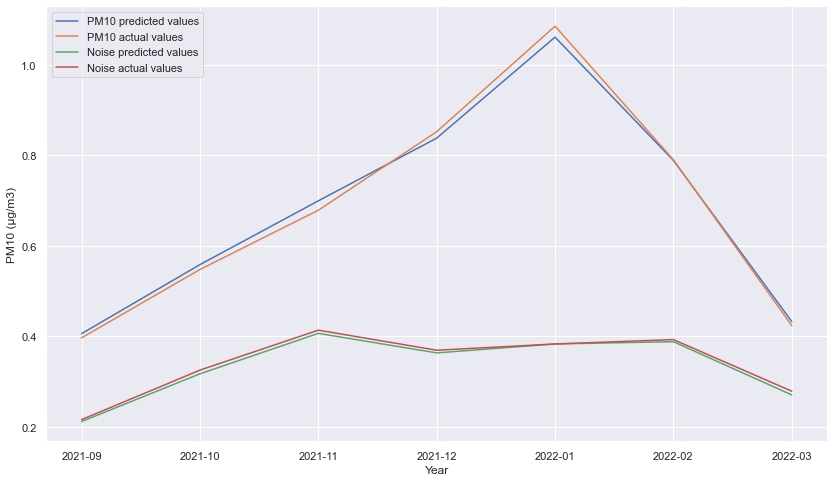

,PM10 predictions,PM10 actuals,Noise predictions,Noise actuals,sensor_id,log,lat,Year,YM
date_time,,,,,,,,,
2021-09-27 01:00:00,0.401072,0.33261,0.121203,0.130952,200cdb67-8dc5-4dcf-ac62-748db636e04e,21.456479,41.975155,2021,2021-09
2021-09-27 01:15:00,0.360651,0.33261,0.115367,0.107143,200cdb67-8dc5-4dcf-ac62-748db636e04e,21.456479,41.975155,2021,2021-09
2021-09-27 01:30:00,0.349439,0.31030,0.097585,0.095238,200cdb67-8dc5-4dcf-ac62-748db636e04e,21.456479,41.975155,2021,2021-09
2021-09-27 01:45:00,0.332751,0.37723,0.086985,0.089286,200cdb67-8dc5-4dcf-ac62-748db636e04e,21.456479,41.975155,2021,2021-09
2021-09-27 02:00:00,0.369883,0.37723,0.081960,0.077381,200cdb67-8dc5-4dcf-ac62-748db636e04e,21.456479,41.975155,2021,2021-09
...,...,...,...,...,...,...,...,...,...
2022-03-02 22:45:00,0.387007,0.37723,0.151958,0.184524,200cdb67-8dc5-4dcf-ac62-748db636e04e,21.456479,41.975155,2022,2022-03
2022-03-02 23:00:00,0.382176,0.37723,0.164501,0.172619,200cdb67-8dc5-4dcf-ac62-748db636e04e,21.456479,41.975155,2022,2022-03
2022-03-02 23:15:00,0.380303,0.37723,0.156918,0.166667,200cdb67-8dc5-4dcf-ac62-748db636e04e,21.456479,41.975155,2022,2022-03


In [21]:
model = Sequential()
model.add(InputLayer(input_size))
model.add(LSTM(64))
model.add(Dense(8, 'selu'))
model.add(Dense(output_size, 'linear'))

model.compile(loss=MeanSquaredError(), optimizer=Adam(learning_rate=0.0001), metrics=[
    RootMeanSquaredError(),
    MeanAbsolutePercentageError()
])

model.summary()

model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=10)

plot_predictions(model, X_test, y_test, y_test_df)

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_4 (LSTM)               (None, 96, 34)            6936      
                                                                 
 lstm_5 (LSTM)               (None, 64)                25344     
                                                                 
 dense_8 (Dense)             (None, 8)                 520       
                                                                 
 dense_9 (Dense)             (None, 2)                 18        
                                                                 
Total params: 32,818
Trainable params: 32,818
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
3217/3217 [==============================] - 309s 95ms/step - loss: 0.0803 - root_mean_squared_error: 0.2834 - val_loss: 0.0499 - val_root_mean_squared_error: 0.2233
Epoch

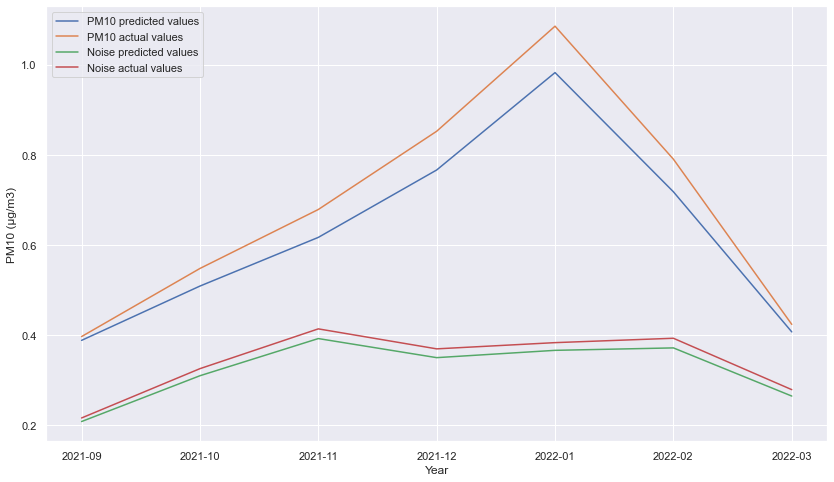

,PM10 predictions,PM10 actuals,Noise predictions,Noise actuals,sensor_id,log,lat,Year,YM
date_time,,,,,,,,,
2021-09-27 01:00:00,0.384013,0.33261,0.112014,0.130952,200cdb67-8dc5-4dcf-ac62-748db636e04e,21.456479,41.975155,2021,2021-09
2021-09-27 01:15:00,0.344979,0.33261,0.112358,0.107143,200cdb67-8dc5-4dcf-ac62-748db636e04e,21.456479,41.975155,2021,2021-09
2021-09-27 01:30:00,0.335714,0.31030,0.096375,0.095238,200cdb67-8dc5-4dcf-ac62-748db636e04e,21.456479,41.975155,2021,2021-09
2021-09-27 01:45:00,0.320183,0.37723,0.086395,0.089286,200cdb67-8dc5-4dcf-ac62-748db636e04e,21.456479,41.975155,2021,2021-09
2021-09-27 02:00:00,0.355111,0.37723,0.081786,0.077381,200cdb67-8dc5-4dcf-ac62-748db636e04e,21.456479,41.975155,2021,2021-09
...,...,...,...,...,...,...,...,...,...
2022-03-02 22:45:00,0.387031,0.37723,0.143494,0.184524,200cdb67-8dc5-4dcf-ac62-748db636e04e,21.456479,41.975155,2022,2022-03
2022-03-02 23:00:00,0.376364,0.37723,0.155577,0.172619,200cdb67-8dc5-4dcf-ac62-748db636e04e,21.456479,41.975155,2022,2022-03
2022-03-02 23:15:00,0.371903,0.37723,0.151512,0.166667,200cdb67-8dc5-4dcf-ac62-748db636e04e,21.456479,41.975155,2022,2022-03


In [22]:
model = Sequential()
model.add(InputLayer(input_size))
model.add(LSTM(34, return_sequences=True))
model.add(LSTM(64))
model.add(Dense(8, 'relu'))
model.add(Dense(output_size, 'linear'))

model.compile(loss=MeanSquaredError(), optimizer=Adam(learning_rate=0.0001), metrics=[RootMeanSquaredError()])

model.summary()

model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=10)

plot_predictions(model, X_test, y_test, y_test_df)

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_6 (LSTM)               (None, 96, 34)            6936      
                                                                 
 lstm_7 (LSTM)               (None, 64)                25344     
                                                                 
 dense_10 (Dense)            (None, 8)                 520       
                                                                 
 dense_11 (Dense)            (None, 2)                 18        
                                                                 
Total params: 32,818
Trainable params: 32,818
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
3217/3217 [==============================] - 311s 95ms/step - loss: 0.1015 - root_mean_squared_error: 0.3186 - val_loss: 0.0612 - val_root_mean_squared_error: 0.2474
Epoch

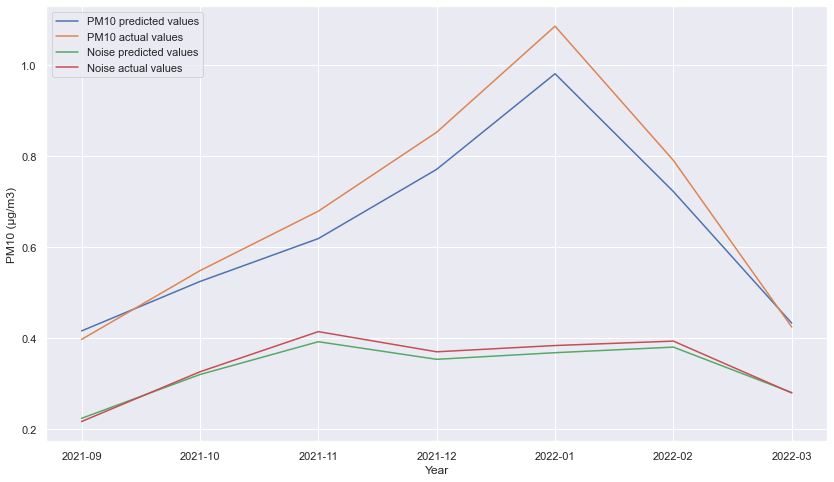

,PM10 predictions,PM10 actuals,Noise predictions,Noise actuals,sensor_id,log,lat,Year,YM
date_time,,,,,,,,,
2021-09-27 01:00:00,0.408663,0.33261,0.134821,0.130952,200cdb67-8dc5-4dcf-ac62-748db636e04e,21.456479,41.975155,2021,2021-09
2021-09-27 01:15:00,0.364044,0.33261,0.133400,0.107143,200cdb67-8dc5-4dcf-ac62-748db636e04e,21.456479,41.975155,2021,2021-09
2021-09-27 01:30:00,0.353957,0.31030,0.119140,0.095238,200cdb67-8dc5-4dcf-ac62-748db636e04e,21.456479,41.975155,2021,2021-09
2021-09-27 01:45:00,0.333376,0.37723,0.107239,0.089286,200cdb67-8dc5-4dcf-ac62-748db636e04e,21.456479,41.975155,2021,2021-09
2021-09-27 02:00:00,0.373771,0.37723,0.096483,0.077381,200cdb67-8dc5-4dcf-ac62-748db636e04e,21.456479,41.975155,2021,2021-09
...,...,...,...,...,...,...,...,...,...
2022-03-02 22:45:00,0.399803,0.37723,0.160785,0.184524,200cdb67-8dc5-4dcf-ac62-748db636e04e,21.456479,41.975155,2022,2022-03
2022-03-02 23:00:00,0.392097,0.37723,0.176235,0.172619,200cdb67-8dc5-4dcf-ac62-748db636e04e,21.456479,41.975155,2022,2022-03
2022-03-02 23:15:00,0.385794,0.37723,0.171489,0.166667,200cdb67-8dc5-4dcf-ac62-748db636e04e,21.456479,41.975155,2022,2022-03


In [23]:
model = Sequential()
model.add(InputLayer(input_size))
model.add(LSTM(34, return_sequences=True))
model.add(LSTM(64))
model.add(Dense(8, 'tanh'))
model.add(Dense(output_size, 'linear'))

model.compile(loss=MeanSquaredError(), optimizer=Adam(learning_rate=0.0001), metrics=[RootMeanSquaredError()])

model.summary()

model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=10)

plot_predictions(model, X_test, y_test, y_test_df)

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_10 (LSTM)              (None, 96, 34)            6936      
                                                                 
 lstm_11 (LSTM)              (None, 64)                25344     
                                                                 
 dense_14 (Dense)            (None, 8)                 520       
                                                                 
 dense_15 (Dense)            (None, 2)                 18        
                                                                 
Total params: 32,818
Trainable params: 32,818
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
3217/3217 [==============================] - 306s 94ms/step - loss: 0.2778 - root_mean_squared_error: 0.5270 - val_loss: 0.1744 - val_root_mean_squared_error: 0.4176
Epoch

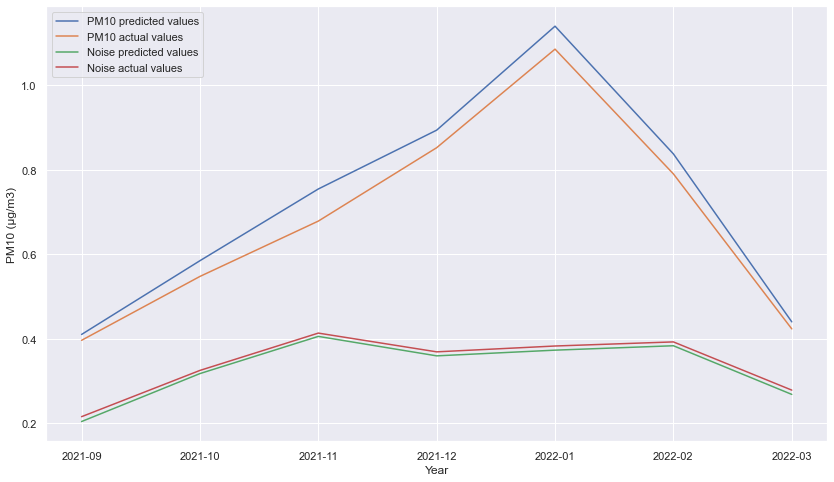

,PM10 predictions,PM10 actuals,Noise predictions,Noise actuals,sensor_id,log,lat,Year,YM
date_time,,,,,,,,,
2021-09-27 01:00:00,0.400752,0.33261,0.114345,0.130952,200cdb67-8dc5-4dcf-ac62-748db636e04e,21.456479,41.975155,2021,2021-09
2021-09-27 01:15:00,0.361933,0.33261,0.115252,0.107143,200cdb67-8dc5-4dcf-ac62-748db636e04e,21.456479,41.975155,2021,2021-09
2021-09-27 01:30:00,0.356254,0.31030,0.097811,0.095238,200cdb67-8dc5-4dcf-ac62-748db636e04e,21.456479,41.975155,2021,2021-09
2021-09-27 01:45:00,0.341255,0.37723,0.089086,0.089286,200cdb67-8dc5-4dcf-ac62-748db636e04e,21.456479,41.975155,2021,2021-09
2021-09-27 02:00:00,0.378294,0.37723,0.074520,0.077381,200cdb67-8dc5-4dcf-ac62-748db636e04e,21.456479,41.975155,2021,2021-09
...,...,...,...,...,...,...,...,...,...
2022-03-02 22:45:00,0.393319,0.37723,0.133869,0.184524,200cdb67-8dc5-4dcf-ac62-748db636e04e,21.456479,41.975155,2022,2022-03
2022-03-02 23:00:00,0.387590,0.37723,0.146083,0.172619,200cdb67-8dc5-4dcf-ac62-748db636e04e,21.456479,41.975155,2022,2022-03
2022-03-02 23:15:00,0.383695,0.37723,0.144681,0.166667,200cdb67-8dc5-4dcf-ac62-748db636e04e,21.456479,41.975155,2022,2022-03


In [42]:
model = Sequential()
model.add(InputLayer(input_size))
model.add(LSTM(34, return_sequences=True))
model.add(LSTM(64))
model.add(Dense(8, 'sigmoid'))
model.add(Dense(output_size, 'linear'))

model.compile(loss=MeanSquaredError(), optimizer=Adam(learning_rate=0.0001), metrics=[RootMeanSquaredError()])

model.summary()

model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=10)

plot_predictions(model, X_test, y_test, y_test_df)

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_12 (LSTM)              (None, 96, 34)            6936      
                                                                 
 lstm_13 (LSTM)              (None, 64)                25344     
                                                                 
 dense_16 (Dense)            (None, 8)                 520       
                                                                 
 dense_17 (Dense)            (None, 2)                 18        
                                                                 
Total params: 32,818
Trainable params: 32,818
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
3217/3217 [==============================] - 313s 96ms/step - loss: 0.0685 - root_mean_squared_error: 0.2616 - val_loss: 0.0476 - val_root_mean_squared_error: 0.2182
Epoch

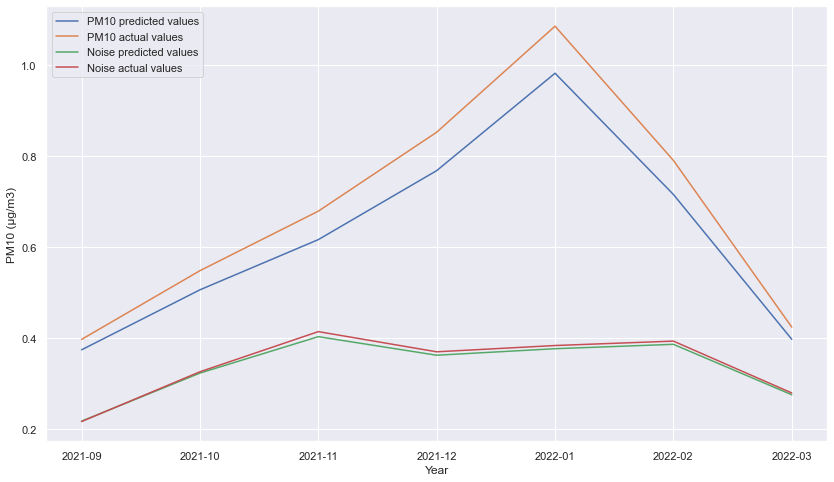

,PM10 predictions,PM10 actuals,Noise predictions,Noise actuals,sensor_id,log,lat,Year,YM
date_time,,,,,,,,,
2021-09-27 01:00:00,0.359518,0.33261,0.120895,0.130952,200cdb67-8dc5-4dcf-ac62-748db636e04e,21.456479,41.975155,2021,2021-09
2021-09-27 01:15:00,0.311539,0.33261,0.119764,0.107143,200cdb67-8dc5-4dcf-ac62-748db636e04e,21.456479,41.975155,2021,2021-09
2021-09-27 01:30:00,0.299406,0.31030,0.109715,0.095238,200cdb67-8dc5-4dcf-ac62-748db636e04e,21.456479,41.975155,2021,2021-09
2021-09-27 01:45:00,0.277336,0.37723,0.101330,0.089286,200cdb67-8dc5-4dcf-ac62-748db636e04e,21.456479,41.975155,2021,2021-09
2021-09-27 02:00:00,0.317425,0.37723,0.089923,0.077381,200cdb67-8dc5-4dcf-ac62-748db636e04e,21.456479,41.975155,2021,2021-09
...,...,...,...,...,...,...,...,...,...
2022-03-02 22:45:00,0.353579,0.37723,0.143653,0.184524,200cdb67-8dc5-4dcf-ac62-748db636e04e,21.456479,41.975155,2022,2022-03
2022-03-02 23:00:00,0.344221,0.37723,0.159513,0.172619,200cdb67-8dc5-4dcf-ac62-748db636e04e,21.456479,41.975155,2022,2022-03
2022-03-02 23:15:00,0.339113,0.37723,0.156918,0.166667,200cdb67-8dc5-4dcf-ac62-748db636e04e,21.456479,41.975155,2022,2022-03


In [43]:
model = Sequential()
model.add(InputLayer(input_size))
model.add(LSTM(34, return_sequences=True))
model.add(LSTM(64))
model.add(Dense(8, 'selu'))
model.add(Dense(output_size, 'linear'))

model.compile(loss=MeanSquaredError(), optimizer=Adam(learning_rate=0.0001), metrics=[RootMeanSquaredError()])

model.summary()

model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=10)

plot_predictions(model, X_test, y_test, y_test_df)

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru (GRU)                   (None, 64)                15744     
                                                                 
 dense_18 (Dense)            (None, 8)                 520       
                                                                 
 dense_19 (Dense)            (None, 2)                 18        
                                                                 
Total params: 16,282
Trainable params: 16,282
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
3217/3217 [==============================] - 163s 50ms/step - loss: 0.0999 - root_mean_squared_error: 0.3161 - val_loss: 0.0465 - val_root_mean_squared_error: 0.2156
Epoch 2/10
3217/3217 [==============================] - 158s 49ms/step - loss: 0.0396 - root_mean_squared_error: 0.1990 - val_loss: 0.039

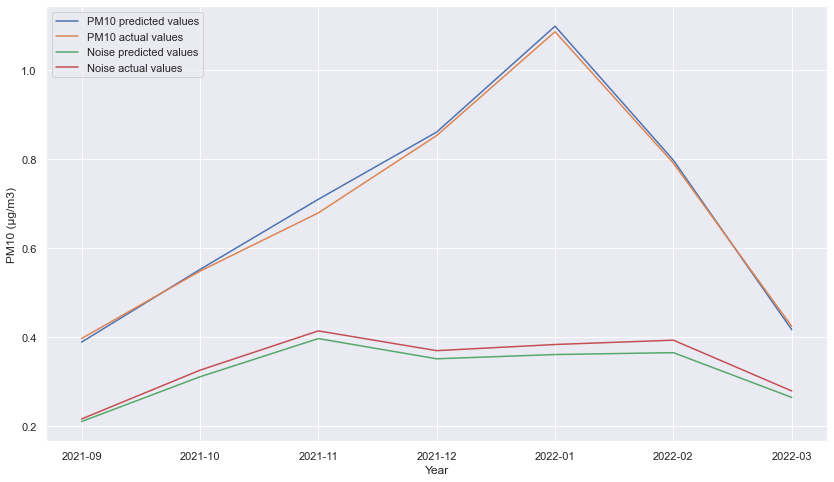

,PM10 predictions,PM10 actuals,Noise predictions,Noise actuals,sensor_id,log,lat,Year,YM
date_time,,,,,,,,,
2021-09-27 01:00:00,0.402865,0.33261,0.126004,0.130952,200cdb67-8dc5-4dcf-ac62-748db636e04e,21.456479,41.975155,2021,2021-09
2021-09-27 01:15:00,0.368534,0.33261,0.124846,0.107143,200cdb67-8dc5-4dcf-ac62-748db636e04e,21.456479,41.975155,2021,2021-09
2021-09-27 01:30:00,0.361891,0.31030,0.113040,0.095238,200cdb67-8dc5-4dcf-ac62-748db636e04e,21.456479,41.975155,2021,2021-09
2021-09-27 01:45:00,0.342992,0.37723,0.104012,0.089286,200cdb67-8dc5-4dcf-ac62-748db636e04e,21.456479,41.975155,2021,2021-09
2021-09-27 02:00:00,0.379377,0.37723,0.093047,0.077381,200cdb67-8dc5-4dcf-ac62-748db636e04e,21.456479,41.975155,2021,2021-09
...,...,...,...,...,...,...,...,...,...
2022-03-02 22:45:00,0.390484,0.37723,0.145583,0.184524,200cdb67-8dc5-4dcf-ac62-748db636e04e,21.456479,41.975155,2022,2022-03
2022-03-02 23:00:00,0.377079,0.37723,0.155312,0.172619,200cdb67-8dc5-4dcf-ac62-748db636e04e,21.456479,41.975155,2022,2022-03
2022-03-02 23:15:00,0.373164,0.37723,0.150115,0.166667,200cdb67-8dc5-4dcf-ac62-748db636e04e,21.456479,41.975155,2022,2022-03


In [44]:
model = Sequential()
model.add(InputLayer(input_size))
model.add(GRU(64))
model.add(Dense(8, 'relu'))
model.add(Dense(output_size, 'linear'))

model.compile(loss=MeanSquaredError(), optimizer=Adam(learning_rate=0.0001), metrics=[RootMeanSquaredError()])

model.summary()

model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=10)

plot_predictions(model, X_test, y_test, y_test_df)

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru_1 (GRU)                 (None, 64)                15744     
                                                                 
 dense_20 (Dense)            (None, 8)                 520       
                                                                 
 dense_21 (Dense)            (None, 2)                 18        
                                                                 
Total params: 16,282
Trainable params: 16,282
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
3217/3217 [==============================] - 164s 50ms/step - loss: 0.0746 - root_mean_squared_error: 0.2731 - val_loss: 0.0428 - val_root_mean_squared_error: 0.2068
Epoch 2/10
3217/3217 [==============================] - 159s 50ms/step - loss: 0.0395 - root_mean_squared_error: 0.1988 - val_loss: 0.03

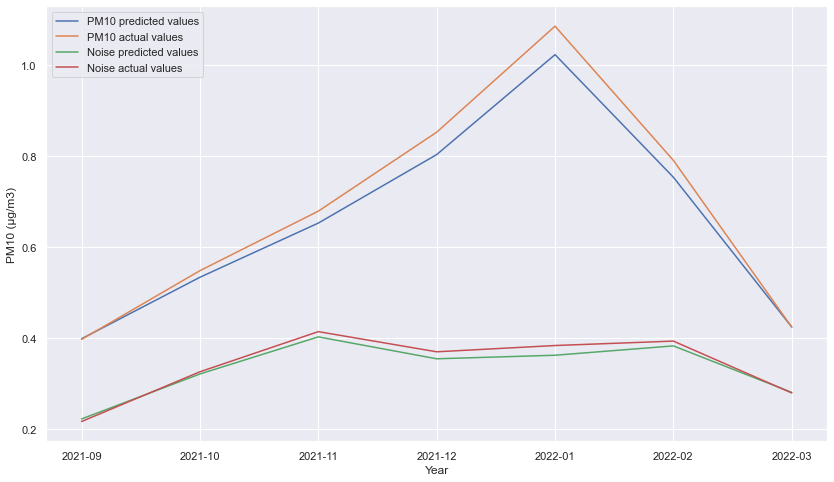

,PM10 predictions,PM10 actuals,Noise predictions,Noise actuals,sensor_id,log,lat,Year,YM
date_time,,,,,,,,,
2021-09-27 01:00:00,0.394949,0.33261,0.139388,0.130952,200cdb67-8dc5-4dcf-ac62-748db636e04e,21.456479,41.975155,2021,2021-09
2021-09-27 01:15:00,0.347094,0.33261,0.147680,0.107143,200cdb67-8dc5-4dcf-ac62-748db636e04e,21.456479,41.975155,2021,2021-09
2021-09-27 01:30:00,0.333662,0.31030,0.127058,0.095238,200cdb67-8dc5-4dcf-ac62-748db636e04e,21.456479,41.975155,2021,2021-09
2021-09-27 01:45:00,0.312006,0.37723,0.116749,0.089286,200cdb67-8dc5-4dcf-ac62-748db636e04e,21.456479,41.975155,2021,2021-09
2021-09-27 02:00:00,0.358845,0.37723,0.094639,0.077381,200cdb67-8dc5-4dcf-ac62-748db636e04e,21.456479,41.975155,2021,2021-09
...,...,...,...,...,...,...,...,...,...
2022-03-02 22:45:00,0.384116,0.37723,0.171691,0.184524,200cdb67-8dc5-4dcf-ac62-748db636e04e,21.456479,41.975155,2022,2022-03
2022-03-02 23:00:00,0.373947,0.37723,0.186360,0.172619,200cdb67-8dc5-4dcf-ac62-748db636e04e,21.456479,41.975155,2022,2022-03
2022-03-02 23:15:00,0.369223,0.37723,0.178780,0.166667,200cdb67-8dc5-4dcf-ac62-748db636e04e,21.456479,41.975155,2022,2022-03


In [45]:
model = Sequential()
model.add(InputLayer(input_size))
model.add(GRU(64))
model.add(Dense(8, 'tanh'))
model.add(Dense(output_size, 'linear'))

model.compile(loss=MeanSquaredError(), optimizer=Adam(learning_rate=0.0001), metrics=[RootMeanSquaredError()])

model.summary()

model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=10)

plot_predictions(model, X_test, y_test, y_test_df)

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru_2 (GRU)                 (None, 64)                15744     
                                                                 
 dense_22 (Dense)            (None, 8)                 520       
                                                                 
 dense_23 (Dense)            (None, 2)                 18        
                                                                 
Total params: 16,282
Trainable params: 16,282
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
3217/3217 [==============================] - 160s 49ms/step - loss: 0.2376 - root_mean_squared_error: 0.4874 - val_loss: 0.1314 - val_root_mean_squared_error: 0.3625
Epoch 2/10
3217/3217 [==============================] - 158s 49ms/step - loss: 0.0904 - root_mean_squared_error: 0.3007 - val_loss: 0.07

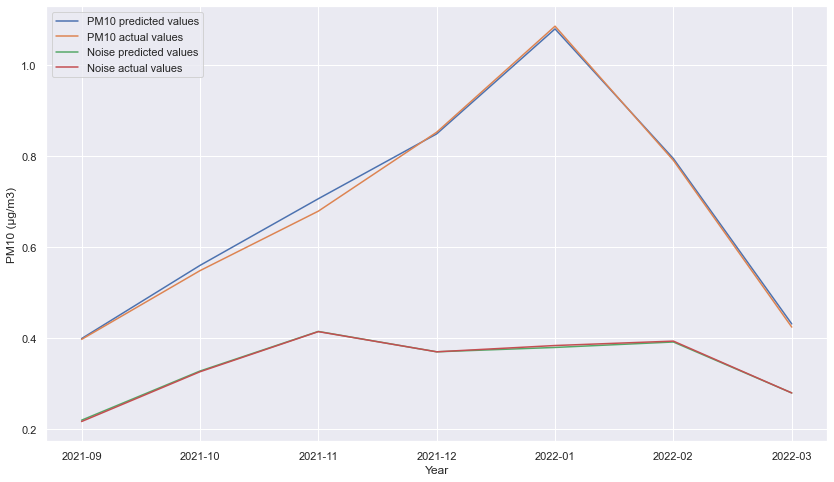

,PM10 predictions,PM10 actuals,Noise predictions,Noise actuals,sensor_id,log,lat,Year,YM
date_time,,,,,,,,,
2021-09-27 01:00:00,0.397535,0.33261,0.129425,0.130952,200cdb67-8dc5-4dcf-ac62-748db636e04e,21.456479,41.975155,2021,2021-09
2021-09-27 01:15:00,0.360787,0.33261,0.123653,0.107143,200cdb67-8dc5-4dcf-ac62-748db636e04e,21.456479,41.975155,2021,2021-09
2021-09-27 01:30:00,0.353099,0.31030,0.106544,0.095238,200cdb67-8dc5-4dcf-ac62-748db636e04e,21.456479,41.975155,2021,2021-09
2021-09-27 01:45:00,0.339950,0.37723,0.095175,0.089286,200cdb67-8dc5-4dcf-ac62-748db636e04e,21.456479,41.975155,2021,2021-09
2021-09-27 02:00:00,0.371190,0.37723,0.086877,0.077381,200cdb67-8dc5-4dcf-ac62-748db636e04e,21.456479,41.975155,2021,2021-09
...,...,...,...,...,...,...,...,...,...
2022-03-02 22:45:00,0.399027,0.37723,0.145472,0.184524,200cdb67-8dc5-4dcf-ac62-748db636e04e,21.456479,41.975155,2022,2022-03
2022-03-02 23:00:00,0.384541,0.37723,0.160467,0.172619,200cdb67-8dc5-4dcf-ac62-748db636e04e,21.456479,41.975155,2022,2022-03
2022-03-02 23:15:00,0.377835,0.37723,0.156632,0.166667,200cdb67-8dc5-4dcf-ac62-748db636e04e,21.456479,41.975155,2022,2022-03


In [46]:
model = Sequential()
model.add(InputLayer(input_size))
model.add(GRU(64))
model.add(Dense(8, 'sigmoid'))
model.add(Dense(output_size, 'linear'))

model.compile(loss=MeanSquaredError(), optimizer=Adam(learning_rate=0.0001), metrics=[RootMeanSquaredError()])

model.summary()

model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=10)

plot_predictions(model, X_test, y_test, y_test_df)

Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru_3 (GRU)                 (None, 64)                15744     
                                                                 
 dense_24 (Dense)            (None, 8)                 520       
                                                                 
 dense_25 (Dense)            (None, 2)                 18        
                                                                 
Total params: 16,282
Trainable params: 16,282
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
3217/3217 [==============================] - 165s 50ms/step - loss: 0.0578 - root_mean_squared_error: 0.2403 - val_loss: 0.0419 - val_root_mean_squared_error: 0.2047
Epoch 2/10
3217/3217 [==============================] - 158s 49ms/step - loss: 0.0386 - root_mean_squared_error: 0.1964 - val_loss: 0.04

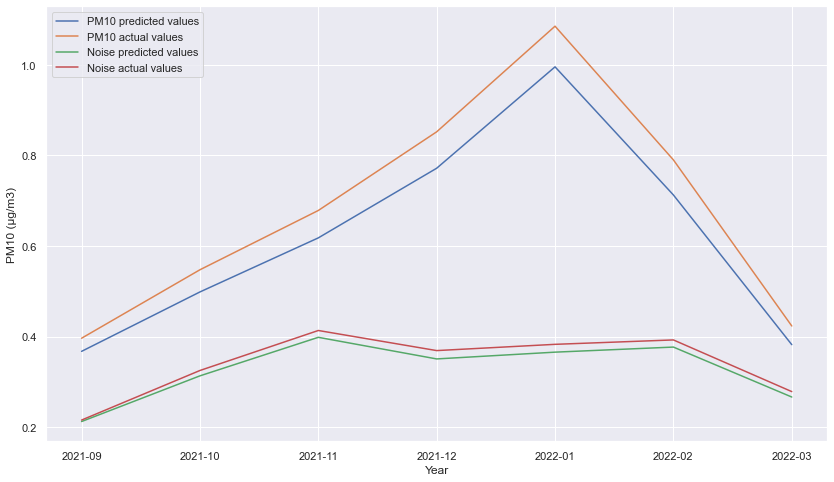

,PM10 predictions,PM10 actuals,Noise predictions,Noise actuals,sensor_id,log,lat,Year,YM
date_time,,,,,,,,,
2021-09-27 01:00:00,0.362327,0.33261,0.123646,0.130952,200cdb67-8dc5-4dcf-ac62-748db636e04e,21.456479,41.975155,2021,2021-09
2021-09-27 01:15:00,0.309089,0.33261,0.117592,0.107143,200cdb67-8dc5-4dcf-ac62-748db636e04e,21.456479,41.975155,2021,2021-09
2021-09-27 01:30:00,0.297511,0.31030,0.101923,0.095238,200cdb67-8dc5-4dcf-ac62-748db636e04e,21.456479,41.975155,2021,2021-09
2021-09-27 01:45:00,0.280042,0.37723,0.091129,0.089286,200cdb67-8dc5-4dcf-ac62-748db636e04e,21.456479,41.975155,2021,2021-09
2021-09-27 02:00:00,0.335198,0.37723,0.087442,0.077381,200cdb67-8dc5-4dcf-ac62-748db636e04e,21.456479,41.975155,2021,2021-09
...,...,...,...,...,...,...,...,...,...
2022-03-02 22:45:00,0.369472,0.37723,0.151178,0.184524,200cdb67-8dc5-4dcf-ac62-748db636e04e,21.456479,41.975155,2022,2022-03
2022-03-02 23:00:00,0.352977,0.37723,0.163799,0.172619,200cdb67-8dc5-4dcf-ac62-748db636e04e,21.456479,41.975155,2022,2022-03
2022-03-02 23:15:00,0.345328,0.37723,0.158685,0.166667,200cdb67-8dc5-4dcf-ac62-748db636e04e,21.456479,41.975155,2022,2022-03


In [47]:
model = Sequential()
model.add(InputLayer(input_size))
model.add(GRU(64))
model.add(Dense(8, 'selu'))
model.add(Dense(output_size, 'linear'))

model.compile(loss=MeanSquaredError(), optimizer=Adam(learning_rate=0.0001), metrics=[RootMeanSquaredError()])

model.summary()

model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=10)

plot_predictions(model, X_test, y_test, y_test_df)

Model: "sequential_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 95, 64)            2112      
                                                                 
 flatten (Flatten)           (None, 6080)              0         
                                                                 
 dense_26 (Dense)            (None, 8)                 48648     
                                                                 
 dense_27 (Dense)            (None, 2)                 18        
                                                                 
Total params: 50,778
Trainable params: 50,778
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
3217/3217 [==============================] - 19s 6ms/step - loss: 0.7736 - root_mean_squared_error: 0.8796 - val_loss: 0.3711 - val_root_mean_squared_error: 0.6092
Epoch 

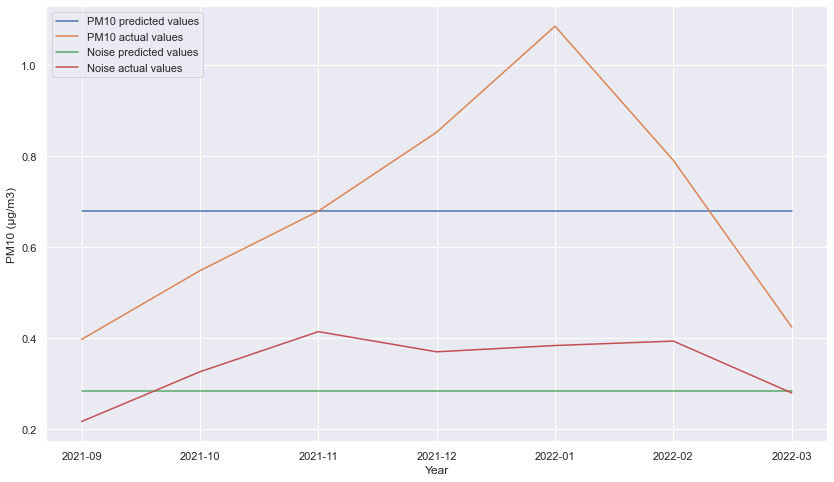

,PM10 predictions,PM10 actuals,Noise predictions,Noise actuals,sensor_id,log,lat,Year,YM
date_time,,,,,,,,,
2021-09-27 01:00:00,0.679635,0.33261,0.284094,0.130952,200cdb67-8dc5-4dcf-ac62-748db636e04e,21.456479,41.975155,2021,2021-09
2021-09-27 01:15:00,0.679635,0.33261,0.284094,0.107143,200cdb67-8dc5-4dcf-ac62-748db636e04e,21.456479,41.975155,2021,2021-09
2021-09-27 01:30:00,0.679635,0.31030,0.284094,0.095238,200cdb67-8dc5-4dcf-ac62-748db636e04e,21.456479,41.975155,2021,2021-09
2021-09-27 01:45:00,0.679635,0.37723,0.284094,0.089286,200cdb67-8dc5-4dcf-ac62-748db636e04e,21.456479,41.975155,2021,2021-09
2021-09-27 02:00:00,0.679635,0.37723,0.284094,0.077381,200cdb67-8dc5-4dcf-ac62-748db636e04e,21.456479,41.975155,2021,2021-09
...,...,...,...,...,...,...,...,...,...
2022-03-02 22:45:00,0.679635,0.37723,0.284094,0.184524,200cdb67-8dc5-4dcf-ac62-748db636e04e,21.456479,41.975155,2022,2022-03
2022-03-02 23:00:00,0.679635,0.37723,0.284094,0.172619,200cdb67-8dc5-4dcf-ac62-748db636e04e,21.456479,41.975155,2022,2022-03
2022-03-02 23:15:00,0.679635,0.37723,0.284094,0.166667,200cdb67-8dc5-4dcf-ac62-748db636e04e,21.456479,41.975155,2022,2022-03


In [48]:
model = Sequential()
model.add(InputLayer(input_size))
model.add(Conv1D(64, kernel_size=2))
model.add(Flatten())
model.add(Dense(8, 'relu'))
model.add(Dense(output_size, 'linear'))

model.compile(loss=MeanSquaredError(), optimizer=Adam(learning_rate=0.0001), metrics=[RootMeanSquaredError()])

model.summary()

model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=10)

plot_predictions(model, X_test, y_test, y_test_df)

Model: "sequential_14"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_1 (Conv1D)           (None, 95, 64)            2112      
                                                                 
 flatten_1 (Flatten)         (None, 6080)              0         
                                                                 
 dense_28 (Dense)            (None, 8)                 48648     
                                                                 
 dense_29 (Dense)            (None, 2)                 18        
                                                                 
Total params: 50,778
Trainable params: 50,778
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
3217/3217 [==============================] - 21s 7ms/step - loss: 0.2720 - root_mean_squared_error: 0.5215 - val_loss: 0.2692 - val_root_mean_squared_error: 0.5189
Epoch 

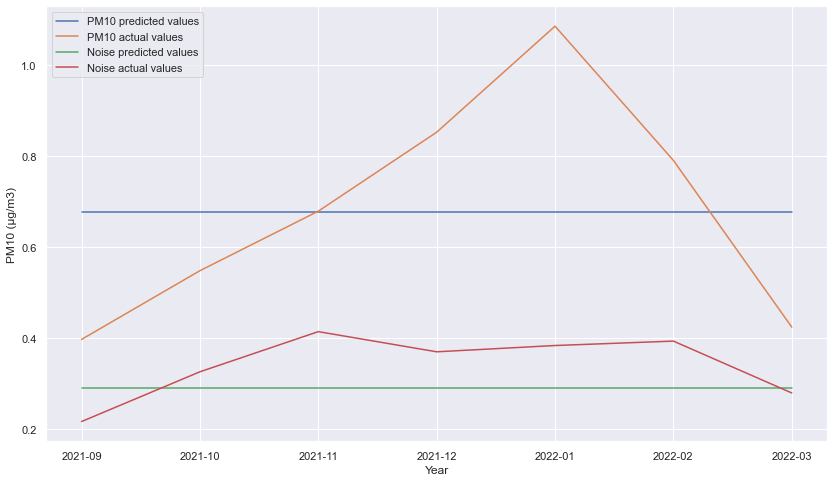

,PM10 predictions,PM10 actuals,Noise predictions,Noise actuals,sensor_id,log,lat,Year,YM
date_time,,,,,,,,,
2021-09-27 01:00:00,0.677326,0.33261,0.290522,0.130952,200cdb67-8dc5-4dcf-ac62-748db636e04e,21.456479,41.975155,2021,2021-09
2021-09-27 01:15:00,0.677326,0.33261,0.290522,0.107143,200cdb67-8dc5-4dcf-ac62-748db636e04e,21.456479,41.975155,2021,2021-09
2021-09-27 01:30:00,0.677326,0.31030,0.290522,0.095238,200cdb67-8dc5-4dcf-ac62-748db636e04e,21.456479,41.975155,2021,2021-09
2021-09-27 01:45:00,0.677326,0.37723,0.290522,0.089286,200cdb67-8dc5-4dcf-ac62-748db636e04e,21.456479,41.975155,2021,2021-09
2021-09-27 02:00:00,0.677326,0.37723,0.290522,0.077381,200cdb67-8dc5-4dcf-ac62-748db636e04e,21.456479,41.975155,2021,2021-09
...,...,...,...,...,...,...,...,...,...
2022-03-02 22:45:00,0.677326,0.37723,0.290522,0.184524,200cdb67-8dc5-4dcf-ac62-748db636e04e,21.456479,41.975155,2022,2022-03
2022-03-02 23:00:00,0.677326,0.37723,0.290522,0.172619,200cdb67-8dc5-4dcf-ac62-748db636e04e,21.456479,41.975155,2022,2022-03
2022-03-02 23:15:00,0.677326,0.37723,0.290522,0.166667,200cdb67-8dc5-4dcf-ac62-748db636e04e,21.456479,41.975155,2022,2022-03


In [49]:
model = Sequential()
model.add(InputLayer(input_size))
model.add(Conv1D(64, kernel_size=2))
model.add(Flatten())
model.add(Dense(8, 'tanh'))
model.add(Dense(output_size, 'linear'))

model.compile(loss=MeanSquaredError(), optimizer=Adam(learning_rate=0.0001), metrics=[RootMeanSquaredError()])

model.summary()

model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=10)

plot_predictions(model, X_test, y_test, y_test_df)

Model: "sequential_15"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_2 (Conv1D)           (None, 95, 64)            2112      
                                                                 
 flatten_2 (Flatten)         (None, 6080)              0         
                                                                 
 dense_30 (Dense)            (None, 8)                 48648     
                                                                 
 dense_31 (Dense)            (None, 2)                 18        
                                                                 
Total params: 50,778
Trainable params: 50,778
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
3217/3217 [==============================] - 20s 6ms/step - loss: 0.2936 - root_mean_squared_error: 0.5418 - val_loss: 0.2681 - val_root_mean_squared_error: 0.5178
Epoch 

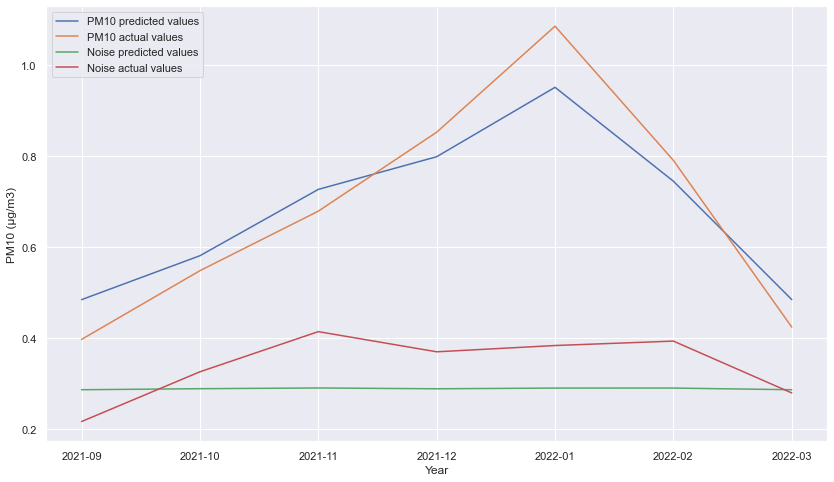

,PM10 predictions,PM10 actuals,Noise predictions,Noise actuals,sensor_id,log,lat,Year,YM
date_time,,,,,,,,,
2021-09-27 01:00:00,0.484019,0.33261,0.285873,0.130952,200cdb67-8dc5-4dcf-ac62-748db636e04e,21.456479,41.975155,2021,2021-09
2021-09-27 01:15:00,0.484019,0.33261,0.285873,0.107143,200cdb67-8dc5-4dcf-ac62-748db636e04e,21.456479,41.975155,2021,2021-09
2021-09-27 01:30:00,0.484019,0.31030,0.285873,0.095238,200cdb67-8dc5-4dcf-ac62-748db636e04e,21.456479,41.975155,2021,2021-09
2021-09-27 01:45:00,0.484019,0.37723,0.285873,0.089286,200cdb67-8dc5-4dcf-ac62-748db636e04e,21.456479,41.975155,2021,2021-09
2021-09-27 02:00:00,0.484019,0.37723,0.285873,0.077381,200cdb67-8dc5-4dcf-ac62-748db636e04e,21.456479,41.975155,2021,2021-09
...,...,...,...,...,...,...,...,...,...
2022-03-02 22:45:00,0.484019,0.37723,0.285873,0.184524,200cdb67-8dc5-4dcf-ac62-748db636e04e,21.456479,41.975155,2022,2022-03
2022-03-02 23:00:00,0.484019,0.37723,0.285873,0.172619,200cdb67-8dc5-4dcf-ac62-748db636e04e,21.456479,41.975155,2022,2022-03
2022-03-02 23:15:00,0.484019,0.37723,0.285873,0.166667,200cdb67-8dc5-4dcf-ac62-748db636e04e,21.456479,41.975155,2022,2022-03


In [50]:
model = Sequential()
model.add(InputLayer(input_size))
model.add(Conv1D(64, kernel_size=2))
model.add(Flatten())
model.add(Dense(8, 'sigmoid'))
model.add(Dense(output_size, 'linear'))

model.compile(loss=MeanSquaredError(), optimizer=Adam(learning_rate=0.0001), metrics=[RootMeanSquaredError()])

model.summary()

model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=10)

plot_predictions(model, X_test, y_test, y_test_df)

Model: "sequential_16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_3 (Conv1D)           (None, 95, 64)            2112      
                                                                 
 flatten_3 (Flatten)         (None, 6080)              0         
                                                                 
 dense_32 (Dense)            (None, 8)                 48648     
                                                                 
 dense_33 (Dense)            (None, 2)                 18        
                                                                 
Total params: 50,778
Trainable params: 50,778
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
3217/3217 [==============================] - 22s 7ms/step - loss: 0.4587 - root_mean_squared_error: 0.6773 - val_loss: 0.1201 - val_root_mean_squared_error: 0.3465
Epoch 

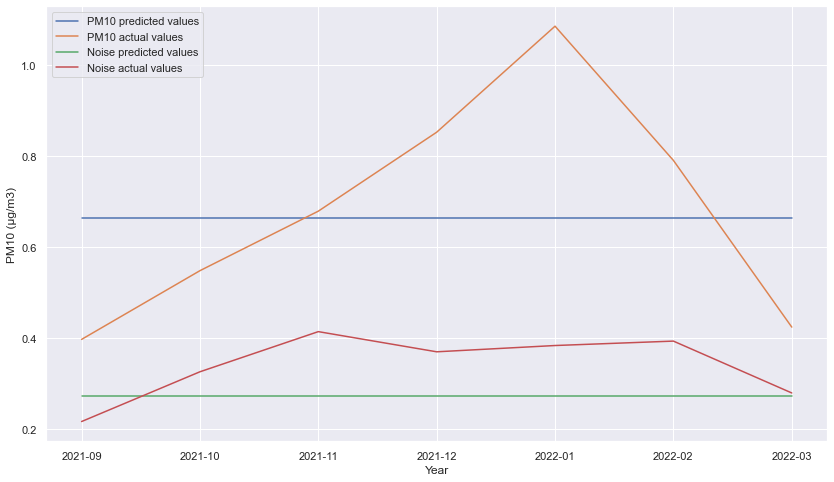

,PM10 predictions,PM10 actuals,Noise predictions,Noise actuals,sensor_id,log,lat,Year,YM
date_time,,,,,,,,,
2021-09-27 01:00:00,0.663155,0.33261,0.273061,0.130952,200cdb67-8dc5-4dcf-ac62-748db636e04e,21.456479,41.975155,2021,2021-09
2021-09-27 01:15:00,0.663155,0.33261,0.273061,0.107143,200cdb67-8dc5-4dcf-ac62-748db636e04e,21.456479,41.975155,2021,2021-09
2021-09-27 01:30:00,0.663155,0.31030,0.273061,0.095238,200cdb67-8dc5-4dcf-ac62-748db636e04e,21.456479,41.975155,2021,2021-09
2021-09-27 01:45:00,0.663155,0.37723,0.273061,0.089286,200cdb67-8dc5-4dcf-ac62-748db636e04e,21.456479,41.975155,2021,2021-09
2021-09-27 02:00:00,0.663155,0.37723,0.273061,0.077381,200cdb67-8dc5-4dcf-ac62-748db636e04e,21.456479,41.975155,2021,2021-09
...,...,...,...,...,...,...,...,...,...
2022-03-02 22:45:00,0.663155,0.37723,0.273061,0.184524,200cdb67-8dc5-4dcf-ac62-748db636e04e,21.456479,41.975155,2022,2022-03
2022-03-02 23:00:00,0.663155,0.37723,0.273061,0.172619,200cdb67-8dc5-4dcf-ac62-748db636e04e,21.456479,41.975155,2022,2022-03
2022-03-02 23:15:00,0.663155,0.37723,0.273061,0.166667,200cdb67-8dc5-4dcf-ac62-748db636e04e,21.456479,41.975155,2022,2022-03


In [51]:
model = Sequential()
model.add(InputLayer(input_size))
model.add(Conv1D(64, kernel_size=2))
model.add(Flatten())
model.add(Dense(8, 'selu'))
model.add(Dense(output_size, 'linear'))

model.compile(loss=MeanSquaredError(), optimizer=Adam(learning_rate=0.0001), metrics=[RootMeanSquaredError()])

model.summary()

model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=10)

plot_predictions(model, X_test, y_test, y_test_df)

Model: "sequential_17"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_14 (LSTM)              (None, 96, 64)            20736     
                                                                 
 dropout (Dropout)           (None, 96, 64)            0         
                                                                 
 lstm_15 (LSTM)              (None, 32)                12416     
                                                                 
 dense_34 (Dense)            (None, 8)                 264       
                                                                 
 dense_35 (Dense)            (None, 2)                 18        
                                                                 
Total params: 33,434
Trainable params: 33,434
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
3217/3217 [===========================

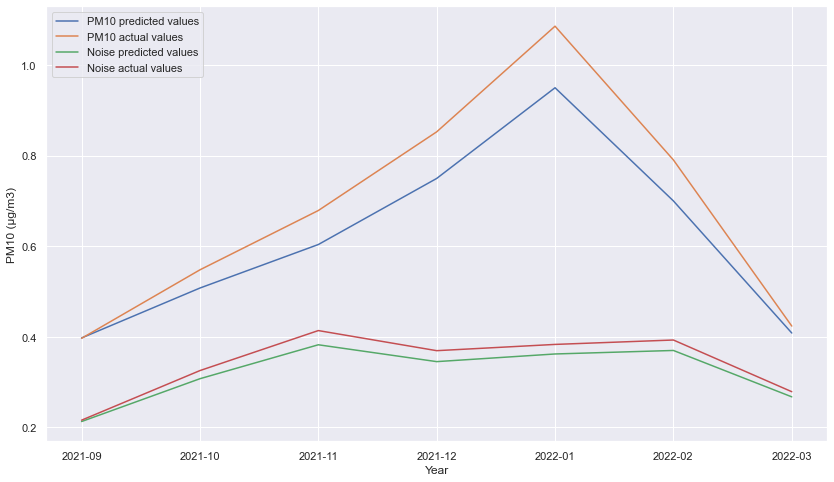

,PM10 predictions,PM10 actuals,Noise predictions,Noise actuals,sensor_id,log,lat,Year,YM
date_time,,,,,,,,,
2021-09-27 01:00:00,0.401098,0.33261,0.129309,0.130952,200cdb67-8dc5-4dcf-ac62-748db636e04e,21.456479,41.975155,2021,2021-09
2021-09-27 01:15:00,0.362192,0.33261,0.122308,0.107143,200cdb67-8dc5-4dcf-ac62-748db636e04e,21.456479,41.975155,2021,2021-09
2021-09-27 01:30:00,0.349751,0.31030,0.108202,0.095238,200cdb67-8dc5-4dcf-ac62-748db636e04e,21.456479,41.975155,2021,2021-09
2021-09-27 01:45:00,0.329467,0.37723,0.095910,0.089286,200cdb67-8dc5-4dcf-ac62-748db636e04e,21.456479,41.975155,2021,2021-09
2021-09-27 02:00:00,0.364632,0.37723,0.086416,0.077381,200cdb67-8dc5-4dcf-ac62-748db636e04e,21.456479,41.975155,2021,2021-09
...,...,...,...,...,...,...,...,...,...
2022-03-02 22:45:00,0.394918,0.37723,0.152008,0.184524,200cdb67-8dc5-4dcf-ac62-748db636e04e,21.456479,41.975155,2022,2022-03
2022-03-02 23:00:00,0.384546,0.37723,0.157707,0.172619,200cdb67-8dc5-4dcf-ac62-748db636e04e,21.456479,41.975155,2022,2022-03
2022-03-02 23:15:00,0.377867,0.37723,0.154307,0.166667,200cdb67-8dc5-4dcf-ac62-748db636e04e,21.456479,41.975155,2022,2022-03


In [52]:
model = Sequential()
model.add(InputLayer(input_size))
model.add(LSTM(64, return_sequences=True))
model.add(Dropout(.2))
model.add(LSTM(32))

model.add(Dense(8, 'relu'))
model.add(Dense(output_size, 'linear'))

model.compile(loss=MeanSquaredError(), optimizer=Adam(learning_rate=0.001), metrics=[RootMeanSquaredError()])

model.summary()

model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=10)

plot_predictions(model, X_test, y_test, y_test_df)

Model: "sequential_18"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_16 (LSTM)              (None, 96, 64)            20736     
                                                                 
 dropout_1 (Dropout)         (None, 96, 64)            0         
                                                                 
 lstm_17 (LSTM)              (None, 32)                12416     
                                                                 
 dense_36 (Dense)            (None, 8)                 264       
                                                                 
 dense_37 (Dense)            (None, 2)                 18        
                                                                 
Total params: 33,434
Trainable params: 33,434
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
3217/3217 [===========================

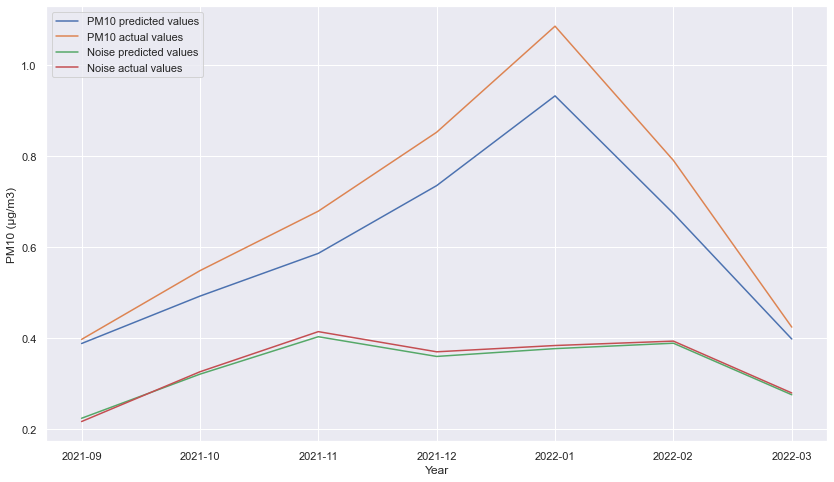

,PM10 predictions,PM10 actuals,Noise predictions,Noise actuals,sensor_id,log,lat,Year,YM
date_time,,,,,,,,,
2021-09-27 01:00:00,0.379199,0.33261,0.145744,0.130952,200cdb67-8dc5-4dcf-ac62-748db636e04e,21.456479,41.975155,2021,2021-09
2021-09-27 01:15:00,0.335431,0.33261,0.143481,0.107143,200cdb67-8dc5-4dcf-ac62-748db636e04e,21.456479,41.975155,2021,2021-09
2021-09-27 01:30:00,0.321360,0.31030,0.128669,0.095238,200cdb67-8dc5-4dcf-ac62-748db636e04e,21.456479,41.975155,2021,2021-09
2021-09-27 01:45:00,0.305917,0.37723,0.121549,0.089286,200cdb67-8dc5-4dcf-ac62-748db636e04e,21.456479,41.975155,2021,2021-09
2021-09-27 02:00:00,0.352796,0.37723,0.112831,0.077381,200cdb67-8dc5-4dcf-ac62-748db636e04e,21.456479,41.975155,2021,2021-09
...,...,...,...,...,...,...,...,...,...
2022-03-02 22:45:00,0.381416,0.37723,0.163989,0.184524,200cdb67-8dc5-4dcf-ac62-748db636e04e,21.456479,41.975155,2022,2022-03
2022-03-02 23:00:00,0.368095,0.37723,0.170364,0.172619,200cdb67-8dc5-4dcf-ac62-748db636e04e,21.456479,41.975155,2022,2022-03
2022-03-02 23:15:00,0.360568,0.37723,0.174220,0.166667,200cdb67-8dc5-4dcf-ac62-748db636e04e,21.456479,41.975155,2022,2022-03


In [53]:
model = Sequential()
model.add(InputLayer(input_size))
model.add(LSTM(64, return_sequences=True))
model.add(Dropout(.2))
model.add(LSTM(32))

model.add(Dense(8, 'tanh'))
model.add(Dense(output_size, 'linear'))

model.compile(loss=MeanSquaredError(), optimizer=Adam(learning_rate=0.001), metrics=[RootMeanSquaredError()])

model.summary()

model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=10)

plot_predictions(model, X_test, y_test, y_test_df)

Model: "sequential_19"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_18 (LSTM)              (None, 96, 64)            20736     
                                                                 
 dropout_2 (Dropout)         (None, 96, 64)            0         
                                                                 
 lstm_19 (LSTM)              (None, 32)                12416     
                                                                 
 dense_38 (Dense)            (None, 8)                 264       
                                                                 
 dense_39 (Dense)            (None, 2)                 18        
                                                                 
Total params: 33,434
Trainable params: 33,434
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
3217/3217 [===========================

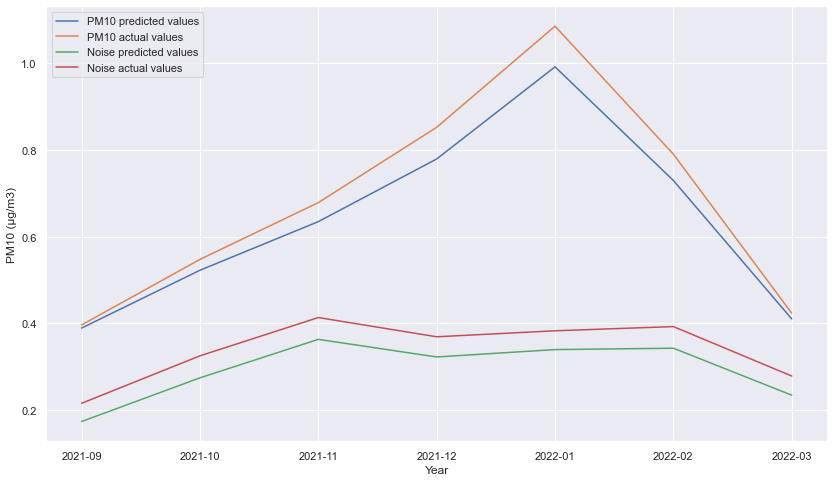

,PM10 predictions,PM10 actuals,Noise predictions,Noise actuals,sensor_id,log,lat,Year,YM
date_time,,,,,,,,,
2021-09-27 01:00:00,0.394121,0.33261,0.095273,0.130952,200cdb67-8dc5-4dcf-ac62-748db636e04e,21.456479,41.975155,2021,2021-09
2021-09-27 01:15:00,0.359357,0.33261,0.091851,0.107143,200cdb67-8dc5-4dcf-ac62-748db636e04e,21.456479,41.975155,2021,2021-09
2021-09-27 01:30:00,0.348114,0.31030,0.084927,0.095238,200cdb67-8dc5-4dcf-ac62-748db636e04e,21.456479,41.975155,2021,2021-09
2021-09-27 01:45:00,0.331185,0.37723,0.080680,0.089286,200cdb67-8dc5-4dcf-ac62-748db636e04e,21.456479,41.975155,2021,2021-09
2021-09-27 02:00:00,0.362553,0.37723,0.076076,0.077381,200cdb67-8dc5-4dcf-ac62-748db636e04e,21.456479,41.975155,2021,2021-09
...,...,...,...,...,...,...,...,...,...
2022-03-02 22:45:00,0.389537,0.37723,0.104135,0.184524,200cdb67-8dc5-4dcf-ac62-748db636e04e,21.456479,41.975155,2022,2022-03
2022-03-02 23:00:00,0.381993,0.37723,0.106545,0.172619,200cdb67-8dc5-4dcf-ac62-748db636e04e,21.456479,41.975155,2022,2022-03
2022-03-02 23:15:00,0.378198,0.37723,0.106381,0.166667,200cdb67-8dc5-4dcf-ac62-748db636e04e,21.456479,41.975155,2022,2022-03


In [54]:
model = Sequential()
model.add(InputLayer(input_size))
model.add(LSTM(64, return_sequences=True))
model.add(Dropout(.2))
model.add(LSTM(32))

model.add(Dense(8, 'sigmoid'))
model.add(Dense(output_size, 'linear'))

model.compile(loss=MeanSquaredError(), optimizer=Adam(learning_rate=0.001), metrics=[RootMeanSquaredError()])

model.summary()

model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=10)

plot_predictions(model, X_test, y_test, y_test_df)

Model: "sequential_20"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_20 (LSTM)              (None, 96, 64)            20736     
                                                                 
 dropout_3 (Dropout)         (None, 96, 64)            0         
                                                                 
 lstm_21 (LSTM)              (None, 32)                12416     
                                                                 
 dense_40 (Dense)            (None, 8)                 264       
                                                                 
 dense_41 (Dense)            (None, 2)                 18        
                                                                 
Total params: 33,434
Trainable params: 33,434
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
3217/3217 [===========================

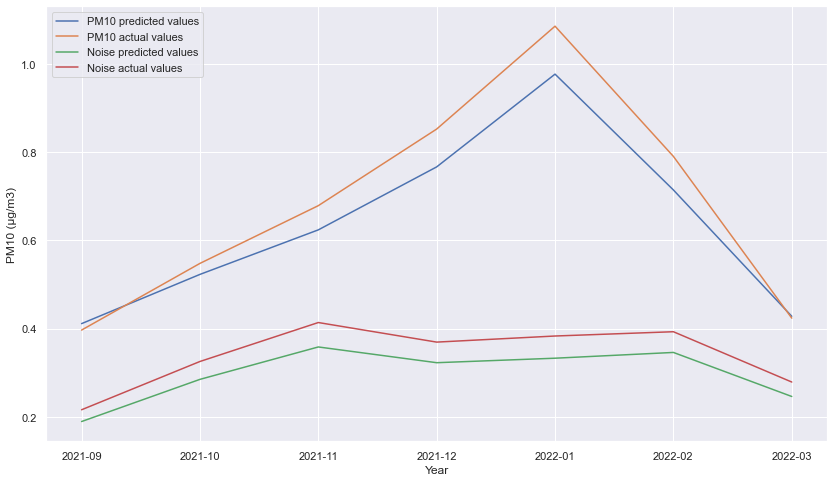

,PM10 predictions,PM10 actuals,Noise predictions,Noise actuals,sensor_id,log,lat,Year,YM
date_time,,,,,,,,,
2021-09-27 01:00:00,0.415890,0.33261,0.111994,0.130952,200cdb67-8dc5-4dcf-ac62-748db636e04e,21.456479,41.975155,2021,2021-09
2021-09-27 01:15:00,0.380266,0.33261,0.106058,0.107143,200cdb67-8dc5-4dcf-ac62-748db636e04e,21.456479,41.975155,2021,2021-09
2021-09-27 01:30:00,0.365065,0.31030,0.096765,0.095238,200cdb67-8dc5-4dcf-ac62-748db636e04e,21.456479,41.975155,2021,2021-09
2021-09-27 01:45:00,0.347264,0.37723,0.091663,0.089286,200cdb67-8dc5-4dcf-ac62-748db636e04e,21.456479,41.975155,2021,2021-09
2021-09-27 02:00:00,0.385151,0.37723,0.087755,0.077381,200cdb67-8dc5-4dcf-ac62-748db636e04e,21.456479,41.975155,2021,2021-09
...,...,...,...,...,...,...,...,...,...
2022-03-02 22:45:00,0.412613,0.37723,0.118774,0.184524,200cdb67-8dc5-4dcf-ac62-748db636e04e,21.456479,41.975155,2022,2022-03
2022-03-02 23:00:00,0.399664,0.37723,0.126569,0.172619,200cdb67-8dc5-4dcf-ac62-748db636e04e,21.456479,41.975155,2022,2022-03
2022-03-02 23:15:00,0.395941,0.37723,0.128638,0.166667,200cdb67-8dc5-4dcf-ac62-748db636e04e,21.456479,41.975155,2022,2022-03


In [55]:
model = Sequential()
model.add(InputLayer(input_size))
model.add(LSTM(64, return_sequences=True))
model.add(Dropout(.2))
model.add(LSTM(32))

model.add(Dense(8, 'selu'))
model.add(Dense(output_size, 'linear'))

model.compile(loss=MeanSquaredError(), optimizer=Adam(learning_rate=0.001), metrics=[RootMeanSquaredError()])

model.summary()

model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=10)

plot_predictions(model, X_test, y_test, y_test_df)

In [56]:
model = Sequential()
model.add(InputLayer(input_size))
model.add(SimpleRNN(128, return_sequences=True))
model.add(LSTM(64, return_sequences=True))
model.add(Dropout(.2))
model.add(LSTM(32))
model.add(Dense(8, 'relu'))
model.add(Dense(output_size, 'linear'))

model.compile(loss=MeanSquaredError(), optimizer=Adam(learning_rate=0.001), metrics=[RootMeanSquaredError()])

model.summary()

model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=10)

plot_predictions(model, X_test, y_test, y_test_df)

Model: "sequential_21"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn (SimpleRNN)      (None, 96, 128)           18560     
                                                                 
 lstm_22 (LSTM)              (None, 96, 64)            49408     
                                                                 
 dropout_4 (Dropout)         (None, 96, 64)            0         
                                                                 
 lstm_23 (LSTM)              (None, 32)                12416     
                                                                 
 dense_42 (Dense)            (None, 8)                 264       
                                                                 
 dense_43 (Dense)            (None, 2)                 18        
                                                                 
Total params: 80,666
Trainable params: 80,666
Non-tra

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "C:\Users\marti\anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 3444, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "C:\Users\marti\AppData\Local\Temp/ipykernel_8684/2922060861.py", line 14, in <module>
    model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=10)
  File "C:\Users\marti\anaconda3\lib\site-packages\keras\utils\traceback_utils.py", line 64, in error_handler
    return fn(*args, **kwargs)
  File "C:\Users\marti\anaconda3\lib\site-packages\keras\engine\training.py", line 1384, in fit
    tmp_logs = self.train_function(iterator)
  File "C:\Users\marti\anaconda3\lib\site-packages\tensorflow\python\util\traceback_utils.py", line 150, in error_handler
    return fn(*args, **kwargs)
  File "C:\Users\marti\anaconda3\lib\site-packages\tensorflow\python\eager\def_function.py", line 915, in __call__
    result = self._call(*args, **kwds)
  File "C:\Users\marti\anaconda3\lib\site-pa

TypeError: object of type 'NoneType' has no len()

In [ ]:
model = Sequential()
model.add(InputLayer(input_size))
model.add(SimpleRNN(128, return_sequences=True))
model.add(LSTM(64, return_sequences=True))
model.add(Dropout(.2))
model.add(LSTM(32))
model.add(Dense(8, 'tanh'))
model.add(Dense(output_size, 'linear'))

model.compile(loss=MeanSquaredError(), optimizer=Adam(learning_rate=0.001), metrics=[RootMeanSquaredError()])

model.summary()

model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=10)

plot_predictions(model, X_test, y_test, y_test_df)

In [ ]:
model = Sequential()
model.add(InputLayer(input_size))
model.add(SimpleRNN(128, return_sequences=True))
model.add(LSTM(64, return_sequences=True))
model.add(Dropout(.2))
model.add(LSTM(32))
model.add(Dense(8, 'sigmoid'))
model.add(Dense(output_size, 'linear'))

model.compile(loss=MeanSquaredError(), optimizer=Adam(learning_rate=0.001), metrics=[RootMeanSquaredError()])

model.summary()

model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=10)

plot_predictions(model, X_test, y_test, y_test_df)

In [ ]:
model = Sequential()
model.add(InputLayer(input_size))
model.add(SimpleRNN(128, return_sequences=True))
model.add(LSTM(64, return_sequences=True))
model.add(Dropout(.2))
model.add(LSTM(32))
model.add(Dense(8, 'selu'))
model.add(Dense(output_size, 'linear'))

model.compile(loss=MeanSquaredError(), optimizer=Adam(learning_rate=0.001), metrics=[RootMeanSquaredError()])

model.summary()

model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=10)

plot_predictions(model, X_test, y_test, y_test_df)

In [ ]:
model = Sequential()
model.add(InputLayer(input_size))
model.add(Conv1D(64, kernel_size=2))
model.add(MaxPooling1D(pool_size=2))
model.add(Flatten())
model.add(Dense(8, 'relu'))
model.add(Dense(output_size, 'linear'))
model.compile(loss=MeanSquaredError(), optimizer=Adam(learning_rate=0.0001), metrics=[RootMeanSquaredError()])

model.summary()

model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=10)

plot_predictions(model, X_test, y_test, y_test_df)

In [ ]:
model = Sequential()
model.add(InputLayer(input_size))
model.add(Conv1D(64, kernel_size=2))
model.add(MaxPooling1D(pool_size=2))
model.add(Flatten())
model.add(Dense(8, 'tanh'))
model.add(Dense(output_size, 'linear'))
model.compile(loss=MeanSquaredError(), optimizer=Adam(learning_rate=0.0001), metrics=[RootMeanSquaredError()])

model.summary()

model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=10)

plot_predictions(model, X_test, y_test, y_test_df)

In [ ]:
model = Sequential()
model.add(InputLayer(input_size))
model.add(Conv1D(64, kernel_size=2))
model.add(MaxPooling1D(pool_size=2))
model.add(Flatten())
model.add(Dense(8, 'sigmoid'))
model.add(Dense(output_size, 'linear'))
model.compile(loss=MeanSquaredError(), optimizer=Adam(learning_rate=0.0001), metrics=[RootMeanSquaredError()])

model.summary()

model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=10)

plot_predictions(model, X_test, y_test, y_test_df)

In [ ]:
model = Sequential()
model.add(InputLayer(input_size))
model.add(Conv1D(64, kernel_size=2))
model.add(MaxPooling1D(pool_size=2))
model.add(Flatten())
model.add(Dense(8, 'selu'))
model.add(Dense(output_size, 'linear'))
model.compile(loss=MeanSquaredError(), optimizer=Adam(learning_rate=0.0001), metrics=[RootMeanSquaredError()])

model.summary()

model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=10)

plot_predictions(model, X_test, y_test, y_test_df)